## Pretty_midi stuff

In [4]:
import pretty_midi
import numpy as np

import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline

import IPython.display

midi_data = pretty_midi.PrettyMIDI('mozart_vc4_mvt1.mid')

print(midi_data.instruments)

[Instrument(program=40, is_drum=False, name="Mozart Violin Concerto"), Instrument(program=48, is_drum=False, name=" #4  K218a    Midi by:"), Instrument(program=48, is_drum=False, name="Bob Fisher")]


/Users/sarah/Desktop/shasha/rt-pitch/pitch-venv/lib/python3.12/site-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


In [8]:
# Initialize a variable to hold the violin instrument
violin_instrument = None

# Iterate through all instruments in the MIDI file
for instrument in midi_data.instruments:
    # Check if the instrument's program number is 39 (General MIDI number for Violin is 40, but zero-indexed here)
    if instrument.program == 40:
        violin_instrument = instrument
        break  # Stop the loop once the violin is found

# Check if a violin instrument was found
if violin_instrument:
    print("Violin instrument found.")
else:
    print("No violin instrument found in the MIDI file.")

Violin instrument found.


In [13]:
import pandas as pd

rows = []
for note in violin_instrument.notes:
    # Print the pitch of each note
    row = [note.pitch, note.get_duration(), note.start, note.end]
    rows.append(row)
    
# Create a DataFrame from the list of rows
df = pd.DataFrame(rows, columns=['pitch', 'duration', 'start', 'end'])
df

,pitch,duration,start,end
0,88,0.118534,86.896488,87.015022
1,86,0.371767,87.025798,87.397565
2,86,0.387931,87.413729,87.801660
3,86,0.118534,87.801660,87.920194
4,86,0.506465,87.930970,88.437435
...,...,...,...,...
2575,79,2.619419,556.130825,558.750244
2576,79,0.734375,558.015869,558.750244
2577,88,0.359375,558.390869,558.750244
2578,78,0.770474,558.765869,559.536342


In [15]:
# Get df dict of all instruments in MIDI
df_dict = {}
for instrument in midi_data.instruments:
    rows = []
    for note in instrument.notes:
        row = [note.pitch, note.get_duration(), note.start, note.end]
        rows.append(row)
    df = pd.DataFrame(rows, columns=['pitch', 'duration', 'start', 'end'])
    df_dict[instrument.program] = df

df_dict

{40:       pitch  duration       start         end
 0        88  0.118534   86.896488   87.015022
 1        86  0.371767   87.025798   87.397565
 2        86  0.387931   87.413729   87.801660
 3        86  0.118534   87.801660   87.920194
 4        86  0.506465   87.930970   88.437435
 ...     ...       ...         ...         ...
 2575     79  2.619419  556.130825  558.750244
 2576     79  0.734375  558.015869  558.750244
 2577     88  0.359375  558.390869  558.750244
 2578     78  0.770474  558.765869  559.536342
 2579     86  0.770474  558.765869  559.536342
 
 [2580 rows x 4 columns],
 48:       pitch  duration       start         end
 0        50  0.506465    2.068964    2.575429
 1        38  0.506465    2.068964    2.575429
 2        50  0.377155    2.586205    2.963360
 3        38  0.377155    2.586205    2.963360
 4        50  0.118534    2.974136    3.092670
 ...     ...       ...         ...         ...
 1401     38  0.515988  573.814654  574.330642
 1402     50  0.167151  

/var/folders/_1/wpkj3xlj2sxd981vsh_0fhd80000gn/T/ipykernel_13032/3330413799.py:3: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  librosa.display.specshow(pm.get_piano_roll(fs)[start_pitch:end_pitch],


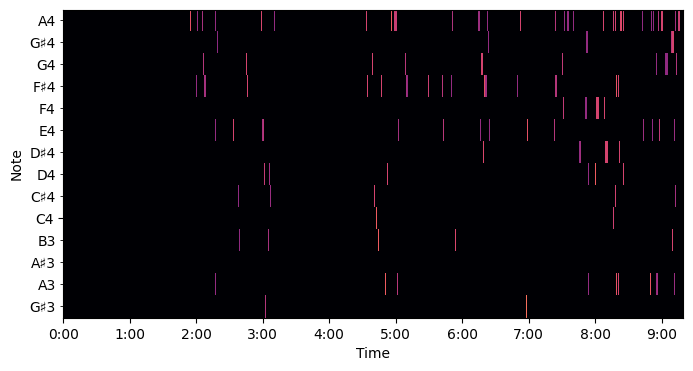

In [9]:
def plot_piano_roll(pm, start_pitch, end_pitch, fs=100):
    # Use librosa's specshow function for displaying the piano roll
    librosa.display.specshow(pm.get_piano_roll(fs)[start_pitch:end_pitch],
                             hop_length=1, sr=fs, x_axis='time', y_axis='cqt_note',
                             fmin=pretty_midi.note_number_to_hz(start_pitch))

plt.figure(figsize=(8, 4))
plot_piano_roll(violin_instrument, 56, 70)

## Music21 stuff

In [ ]:
from music21 import *
s = corpus.parse('bach/bwv65.2.xml')
# s.show()

In [ ]:
from music21 import converter

# Load the MIDI file using music21
music21_midi = converter.parse('mozart_vc4_mvt1.mid')
music21_midi.show()

In [46]:
from music21 import *
# List all parts (instruments)
# for part in music21_midi.parts:
#     print(part.id)  # Prints part names, if available
#     instr = part.getInstrument()
#     print(f'id: {part.id} instrument: {instr}')

instr = instrument.Violin
for part in instrument.partitionByInstrument(music21_midi):
    if isinstance(part.getInstrument(), instr):
        violin_part = part
        break

rows = []
for element in violin_part.recurse():
    if isinstance(element, note.Note):
        row = [element.pitch, element.duration.quarterLength, element.offset]
        print(f'row: {row}')
    elif isinstance(element, chord.Chord):
        chord_pitches = '+'.join(str(p) for p in element.pitches)
        row = [chord_pitches, element.duration.quarterLength, element.offset]
        print(f'row: {row}')
    rows.append(row)

violin21_df = pd.DataFrame(rows, columns=['pitch', 'duration', 'start', '??'])
# violin21_df

for thisNote in violin_part.getElementsByClass(note.Note):
    print(thisNote, thisNote.offset)

# Access notes and chords from a specific part
# for element in music21_midi.parts[0].recurse():
    # if isinstance(element, note.Note):
        # For individual notes
        # print(f'pitch: {element}')
        # print(f'Pitch: {element.pitch}, Start: {element.offset}, Duration: {element.duration.quarterLength}, End: {element.offset + element.duration.quarterLength}')
    # elif isinstance(element, chord.Chord):
        # For chords
        # print(f'Chord: {element}')
        # pitches = '+'.join(str(p) for p in element.pitches)  # Concatenates all pitches in the chord
        # print(f'Chord Pitches: {pitches}, Start: {element.offset}, Duration: {element.duration.quarterLength}, End: {element.offset + element.duration.quarterLength}')

In [27]:
from music21 import note
for attr in dir(note.Note):
    if not attr.startswith('_'):
        print(attr)

activeSite
addLyric
augmentOrDiminish
beat
beatDuration
beatStr
beatStrength
classSet
classSortOrder
classes
clearCache
containerHierarchy
contextSites
derivation
duration
editorial
equalityAttributes
fullName
getAllContextsByClass
getContextByClass
getGrace
getInstrument
getOffsetBySite
getOffsetInHierarchy
getSpannerSites
hasEditorialInformation
hasStyleInformation
hasVolumeInformation
id
informSites
insertLyric
isChord
isClassOrSubclass
isNote
isRest
isStream
lyric
measureNumber
mergeAttributes
name
nameWithOctave
next
notehead
noteheadFill
noteheadParenthesis
octave
offset
pitchChanged
pitches
previous
priority
purgeLocations
purgeOrphans
quarterLength
seconds
setOffsetBySite
show
sortTuple
splitAtDurations
splitAtQuarterLength
splitByQuarterLengths
stemDirection
step
storedInstrument
style
tie
transpose
volume
write


In [29]:
# print(dir(music21_midi.parts))
for attr in dir(music21_midi.parts):
    if not attr.startswith('_'):
        print(attr)

activeElementList
activeInformation
addFilter
classSet
classes
cleanup
cleanupOnStop
clone
count
elementIndex
elementsLength
filters
first
getElementById
getElementsByClass
getElementsByGroup
getElementsByOffset
getElementsByQuerySelector
getElementsNotOfClass
index
isClassOrSubclass
iterSection
last
matchesFilters
matchingElements
notes
notesAndRests
overrideDerivation
parts
removeFilter
reset
resetCaches
restoreActiveSites
sectionIndex
spanners
srcStream
srcStreamElements
stream
streamLength
updateActiveInformation
voices


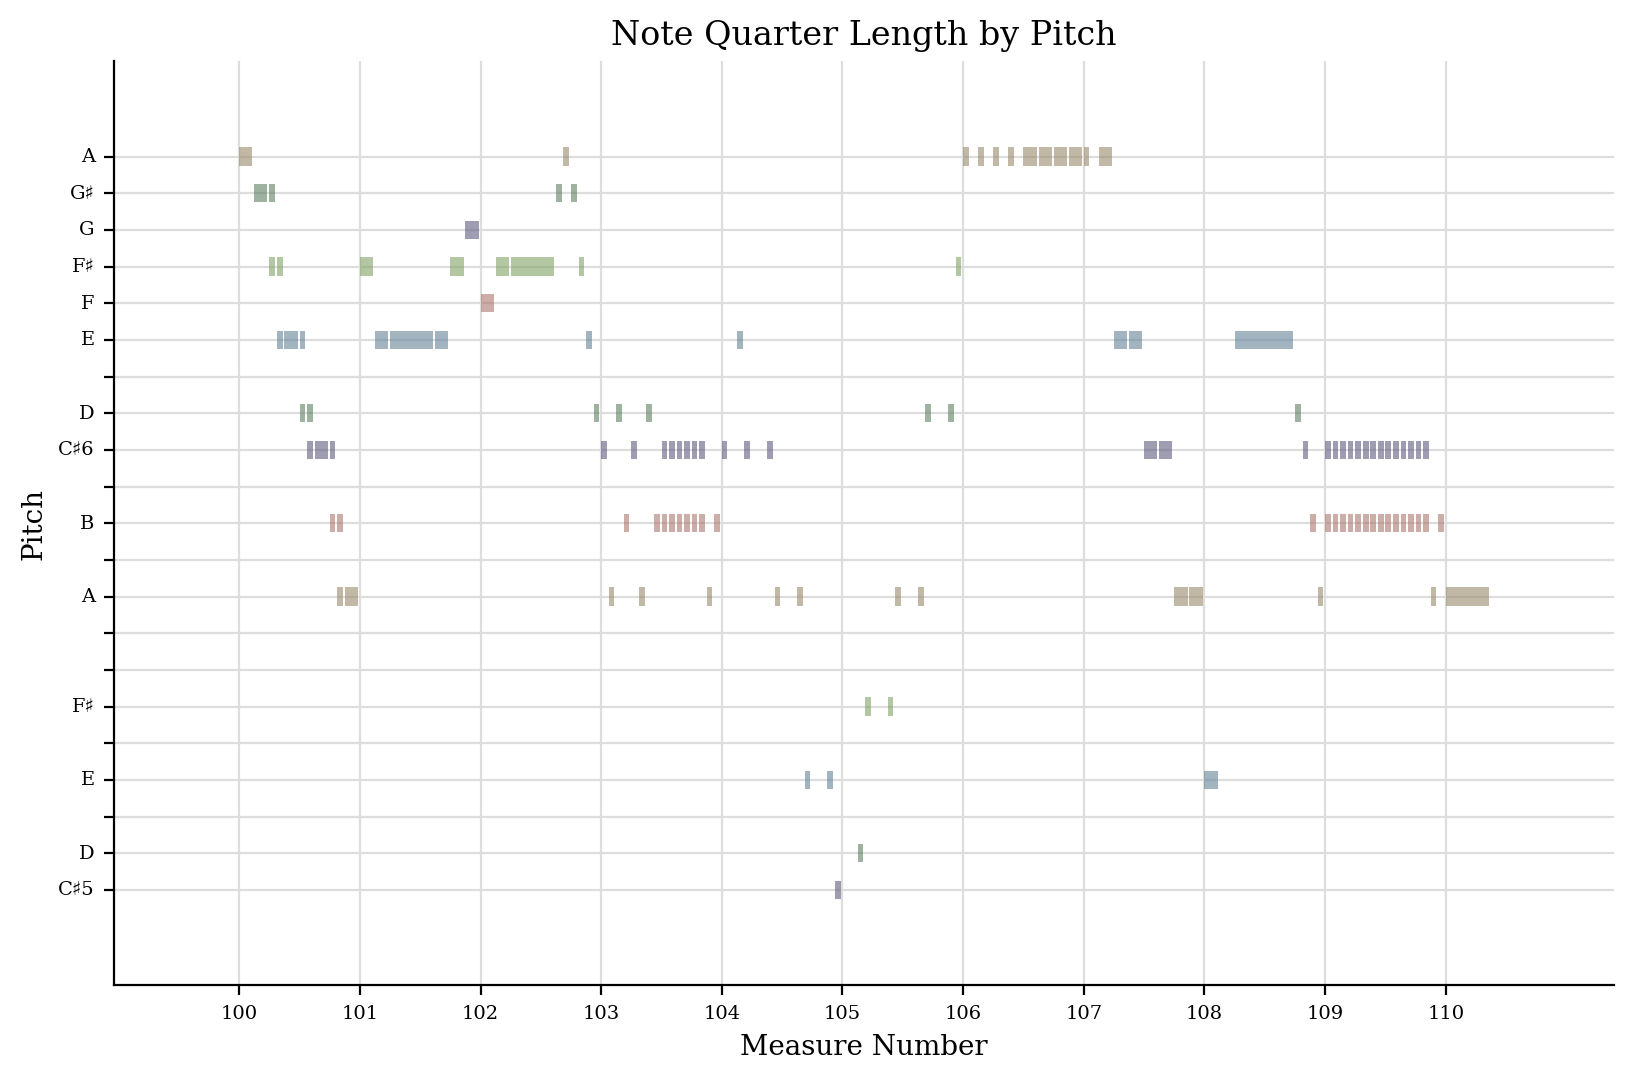

In [61]:
violin_part = music21_midi.parts[0]

# violin_measure_1 = violin_part.measure(1)
violin_part.measures(100, 110).plot()

/var/folders/_1/wpkj3xlj2sxd981vsh_0fhd80000gn/T/ipykernel_13032/1590205558.py:7: StreamIteratorInefficientWarning: flat is not defined on StreamIterators. Call .stream() first for efficiency
  for nt in midi_part.flat.notes:


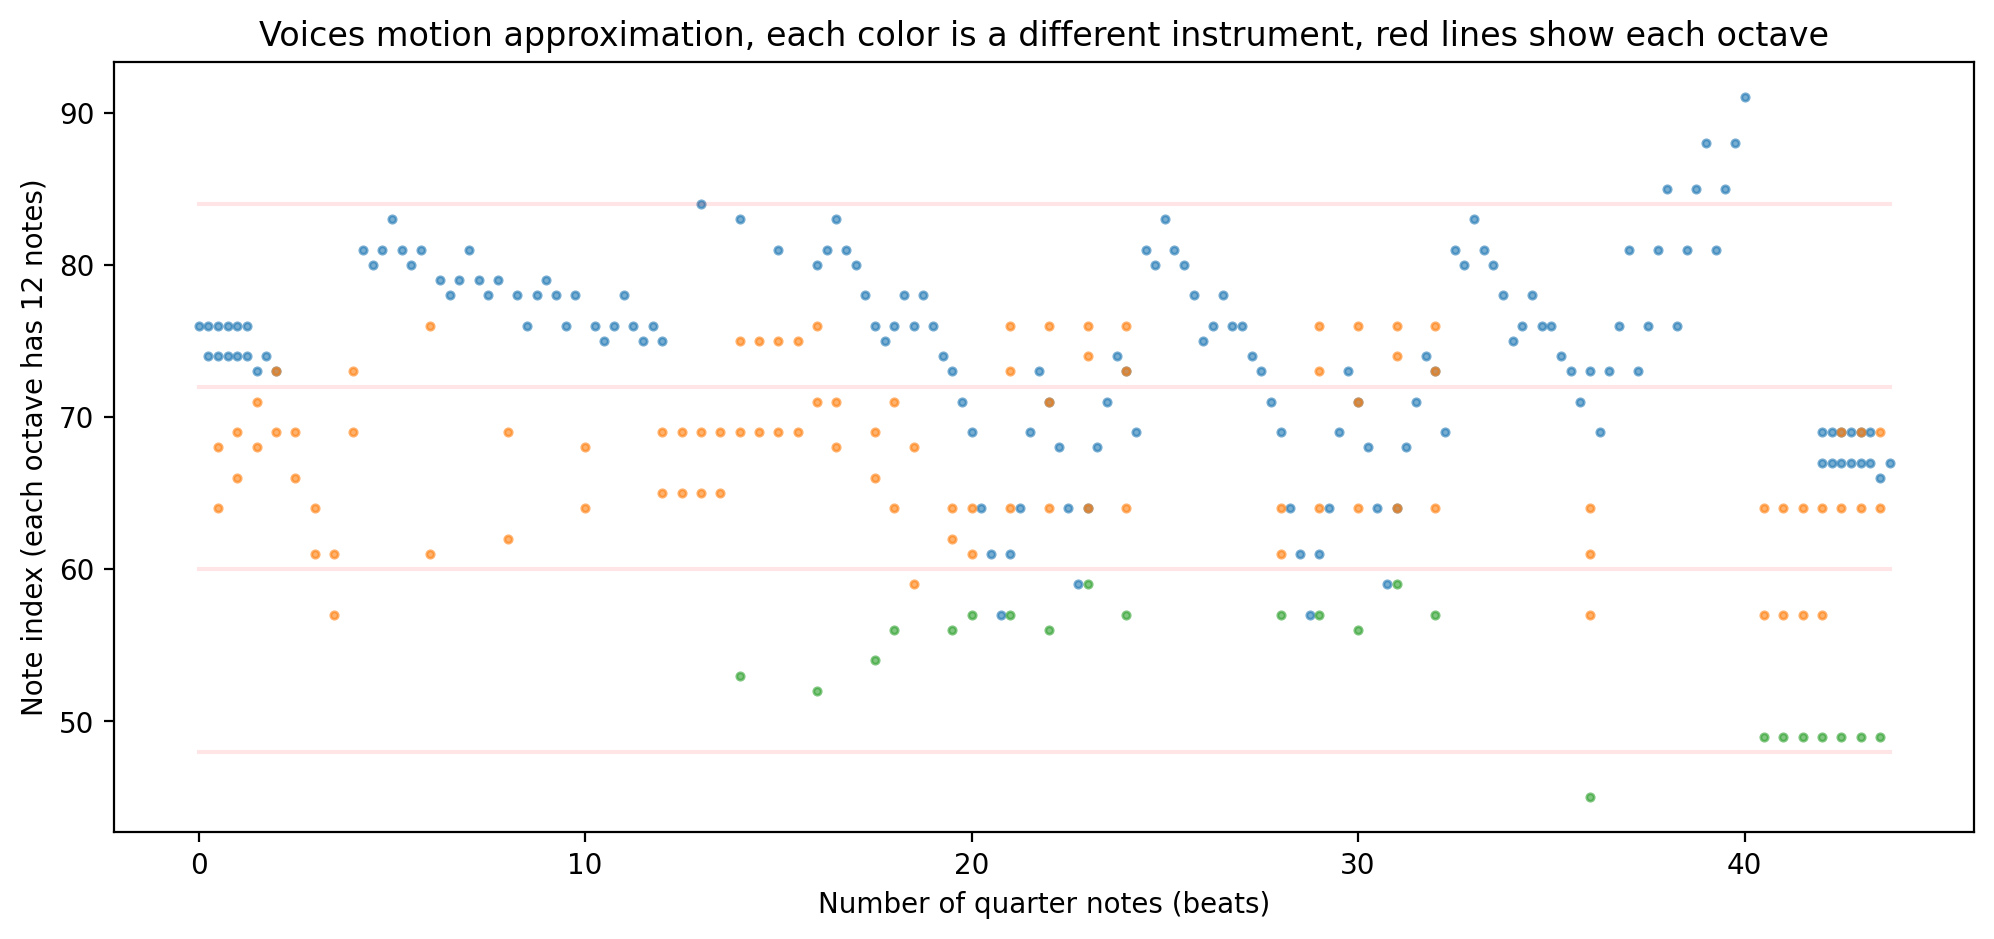

In [64]:
# code from waldecir faria on kaggle
# https://www.kaggle.com/code/wfaria/midi-music-data-extraction-using-music21
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

def extract_notes(midi_part):
    parent_element = []
    ret = []
    for nt in midi_part.flat.notes:        
        if isinstance(nt, note.Note):
            ret.append(max(0.0, nt.pitch.ps))
            parent_element.append(nt)
        elif isinstance(nt, chord.Chord):
            for pitch in nt.pitches:
                ret.append(max(0.0, pitch.ps))
                parent_element.append(nt)
    
    return ret, parent_element

def print_parts_countour(midi):
    fig = plt.figure(figsize=(12, 5))
    ax = fig.add_subplot(1, 1, 1)
    minPitch = pitch.Pitch('C10').ps
    maxPitch = 0
    xMax = 0
    
    # Drawing notes.
    for i in range(len(midi.parts)):
        top = midi.parts[i].flat.notes                  
        y, parent_element = extract_notes(top)
        if (len(y) < 1): continue
            
        x = [n.offset for n in parent_element]
        ax.scatter(x, y, alpha=0.6, s=7)
        
        aux = min(y)
        if (aux < minPitch): minPitch = aux
            
        aux = max(y)
        if (aux > maxPitch): maxPitch = aux
            
        aux = max(x)
        if (aux > xMax): xMax = aux
    
    for i in range(1, 10):
        linePitch = pitch.Pitch('C{0}'.format(i)).ps
        if (linePitch > minPitch and linePitch < maxPitch):
            ax.add_line(mlines.Line2D([0, xMax], [linePitch, linePitch], color='red', alpha=0.1))            

    plt.ylabel("Note index (each octave has 12 notes)")
    plt.xlabel("Number of quarter notes (beats)")
    plt.title('Voices motion approximation, each color is a different instrument, red lines show each octave')
    plt.show()

# Focusing only on 6 first measures to make it easier to understand.

print_parts_countour(music21_midi.measures(70, 80))

In [66]:
m70easures = music21_midi.measures(70, 80)
# m70easures.show()

### YAYY getting pitches requires to flat

In [71]:
violin_part = music21_midi.parts[0]
violin_flat = violin_part.flatten()

len(violin_flat.notes)

rows = []
for element in violin_flat.notes:
    if isinstance(element, note.Note):
        row = [element.pitch, element.duration.quarterLength, element.offset]
        print(f'row: {row}')
    elif isinstance(element, chord.Chord):
        chord_pitches = '+'.join(str(p) for p in element.pitches)
        row = [chord_pitches, element.duration.quarterLength, element.offset]
        print(f'row: {row}')
    rows.append(row)

violin21_df = pd.DataFrame(rows, columns=['pitch', 'duration', 'start'])
violin21_df

row: [<music21.pitch.Pitch E6>, 0.25, 168.0]
row: [<music21.pitch.Pitch D6>, 0.75, 168.25]
row: [<music21.pitch.Pitch D6>, 0.75, 169.0]
row: [<music21.pitch.Pitch D6>, 0.25, 169.75]
row: [<music21.pitch.Pitch D6>, 1.0, 170.0]
row: [<music21.pitch.Pitch D6>, 1.0, 171.0]
row: [<music21.pitch.Pitch D6>, 1.0, 172.0]
row: [<music21.pitch.Pitch F#6>, 0.25, 173.5]
row: [<music21.pitch.Pitch A6>, 1.0, 174.0]
row: [<music21.pitch.Pitch F#6>, 0.25, 175.5]
row: [<music21.pitch.Pitch D6>, 0.25, 176.0]
row: [<music21.pitch.Pitch F#6>, 0.25, 176.5]
row: [<music21.pitch.Pitch A6>, 0.25, 177.0]
row: [<music21.pitch.Pitch F#6>, 0.25, 177.5]
row: [<music21.pitch.Pitch D6>, 0.25, 178.0]
row: [<music21.pitch.Pitch F#6>, 0.25, 178.5]
row: [<music21.pitch.Pitch A6>, 0.25, 179.0]
row: [<music21.pitch.Pitch F#6>, 0.25, 179.5]
row: [<music21.pitch.Pitch D6>, 1.0, 180.0]
row: [<music21.pitch.Pitch D6>, 0.5, 183.0]
row: [<music21.pitch.Pitch C#6>, 0.5, 183.5]
row: [<music21.pitch.Pitch D6>, 0.25, 184.0]
row: [<m

,pitch,duration,start
0,E6,0.25,168.0
1,D6,0.75,168.25
2,D6,0.75,169.0
3,D6,0.25,169.75
4,D6,1.0,170.0
...,...,...,...
2155,E6+F#6,0.25,1067.0
2156,E6+F#6,0.25,1067.25
2157,D6+G5,0.5,1067.5
2158,E6,0.25,1067.75


In [2]:
from midi2audio import FluidSynth

soundfont = 'MuseScore_General.sf3'
fs = FluidSynth(soundfont)
fs.midi_to_audio('mozart_vc4_mvt1.mid', 'mozart_vc4_mvt1.wav')

FluidSynth runtime version 2.3.5
Copyright (C) 2000-2024 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of Creative Technology Ltd.

Rendering audio to file 'mozart_vc4_mvt1.wav'..
